n:
2.007
C:
-61.783


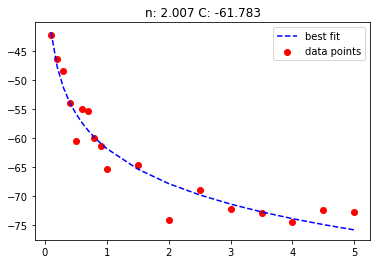

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import curve_fit

dist_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,3,3.5,4,4.5,5]

df_array = []
for x in range(18):
    df_array.append(pd.read_csv('./pathloss/{}.csv'.format(x+1), header=None))

rssi_avgs =[]
for df in df_array:
    rssi_avgs.append(df.mean().values[0])

def rssi(d, n, C):
    return -10 * n*np.log10(d) + C

param, param_cov = curve_fit(rssi, dist_array, rssi_avgs)

print("n:") 
n=np.round(param[0],3)
print(n)
print("C:") 
C = np.round(param[1],3)
print(C)

ans = -10 * param[0]*np.log10(dist_array) + param[1]

fig = plt.figure()
plt.scatter(dist_array, rssi_avgs, color='r', label ="data points")
plt.plot(dist_array, ans, '--', color ='blue', label ="best fit") 
plt.legend()
plt.title('n: {} C: {}'.format(n,C))
plt.show()